# Znajdowanie określonego kodonu w genie #
Geny są reprezentowane ciągiem znaków A, C, G, T
Każda litera reprezentuje nukleotyd, a kombinacja trzech nukleotydów jest nazywana kodonem.
Kodon koduje określony aminokwas, który w połączeniu z innymi aminokwasami może tworzyć białko.

Kodony można definiować jako krotki składające się z trzech obiektów Nucleotide,
natomiast gen można definiować jako listy obiektów Codon

In [111]:
from enum import IntEnum
from typing import  Tuple, List

In [112]:
#Nucleotide jest typu IntEnum
Nucleotide: IntEnum = IntEnum('Nucleotide', ('A', 'C', 'G', 'T'))

In [113]:
Codon = Tuple[Nucleotide, Nucleotide, Nucleotide] #alis typu dla kodonów
Gene = List[Codon] #alias typu dla genów

In [143]:
gene_str: str = "ACGTGGTACCGTCATTAGCTTACCATTGCTTTAAGTGGATCC"

In [144]:

#przekształcenienie trzech kolejnych znaków w Codon, który jest dodawany na końcu nowego genu.
def string_to_gene(s: str) -> Gene:
    gene: Gene = []
    for i in range(0, len(s), 3):
        #Gdy dwa miejsca za obecnie analizowaną pozycją nie można znaleźć już nukleotydu,
        #to ignoruje jeden lub dwa ostatnie nukleotydy. (koniec niepełnego genu)
        if(i + 2) >= len(s): #Nie przekrocz do końca 
            return gene
        #inicjalizuj kodon na bazie trzech nukeotydów
        codon: Codon = (Nucleotide[s[i]], Nucleotide[s[i+1]], Nucleotide[s[i+2]]) 
        #dodaj kodon do genu
        gene.append(codon)
    return gene

In [145]:
my_gene: Gene = string_to_gene(gene_str)
print(my_gene)

[(<Nucleotide.A: 1>, <Nucleotide.C: 2>, <Nucleotide.G: 3>), (<Nucleotide.T: 4>, <Nucleotide.G: 3>, <Nucleotide.G: 3>), (<Nucleotide.T: 4>, <Nucleotide.A: 1>, <Nucleotide.C: 2>), (<Nucleotide.C: 2>, <Nucleotide.G: 3>, <Nucleotide.T: 4>), (<Nucleotide.C: 2>, <Nucleotide.A: 1>, <Nucleotide.T: 4>), (<Nucleotide.T: 4>, <Nucleotide.A: 1>, <Nucleotide.G: 3>), (<Nucleotide.C: 2>, <Nucleotide.T: 4>, <Nucleotide.T: 4>), (<Nucleotide.A: 1>, <Nucleotide.C: 2>, <Nucleotide.C: 2>), (<Nucleotide.A: 1>, <Nucleotide.T: 4>, <Nucleotide.T: 4>), (<Nucleotide.G: 3>, <Nucleotide.C: 2>, <Nucleotide.T: 4>), (<Nucleotide.T: 4>, <Nucleotide.T: 4>, <Nucleotide.A: 1>), (<Nucleotide.A: 1>, <Nucleotide.G: 3>, <Nucleotide.T: 4>), (<Nucleotide.G: 3>, <Nucleotide.G: 3>, <Nucleotide.A: 1>), (<Nucleotide.T: 4>, <Nucleotide.C: 2>, <Nucleotide.C: 2>)]


# Przeszukiwanie liniowe #
Jedną z operacji jaki można wykonać na genie, jest wyszukiwanie określonego kodonu. Celem jest ustalenie, czy kodon znajduje się w genie. Operacja przeszukiwania liniowego przechodzi przez wszystkie elementy w przeszukiwanym obszrze, w kolejności zgodnej z wewnętrzną strukturą danych, dopóki nie znajdzie tego, czego szuka lub nie dotrze do końca struktury danych. Przeszukiwanie liniowe jest najbardziej najłatwiejszy, naturalny i oczywisty sposób szukania czegoś. W najgorszym przypadku przeszukiwanie liowe będzie wymagało przejścia przez wszystkie elementy w strukturze danych, a zatem ma złożoność O(n), gdzie n to liczba elementów w strukturze.

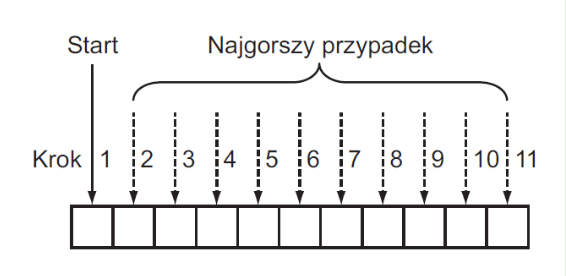

In [146]:
def linear_contains(gene: Gene, key_codon: Codon) -> bool:
    for codon in gene:
        if codon == key_codon:
            return True
        return False
acg: Codon = (Nucleotide.A, Nucleotide.C, Nucleotide.G)
gat: Codon = (Nucleotide.G, Nucleotide.A, Nucleotide.T)
print(linear_contains(my_gene, acg))
print(linear_contains(my_gene, gat))

True
False


W pythonie wszystkie wbudowane typy sekwencyjne list, tuple, range implementują metodę contains(), która umożliwia wyszukiwanie w nich określonego elementu po prostu przy uzyciu operatora in

# Wyszukiwanie binarne #
Istnieje szybszy sposób wyszukiwania niż przechodzenie przez wszystkie elementy, aby go zastosować, trzeba znać kolejność danych w strukturze danych. Jeśli wiemy, że struktura jest posortowana i zapewnia natychmiastowy dostęp do dowolnego elementu za pomocą indeksu, możemy przeprowadzić wyszukiwanie binarne. W świetle tych kryteriów posortowana lista Pythona  swietnie się nadaje do wyszukiwania binarnego.

Wyszukiwanie binarne polega na znajdowaniu środkowego elementu w posortowanym zakresie elementów,
porównaniu go z wyszukiwanym elementem, zmniejszaniu zakreu o połowę na podstawie wyniku tego po©ownania i zaczynaniu procesu od nowa.

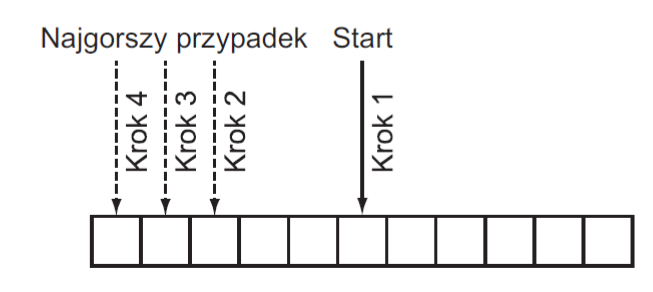
Wyszukiwanie binarne stale zmniejsza obszar wyszkiwania o połowe, w związku z tym czas wykonania wynosi w najgorszym przypadku O(lg n). Istnieje jednak pewnw ograniczenie. W odrożnieniu od wyszukiwania liniowego, wyszukiwanie binarne wymaga, aby przeszukiwana struktura danych była posortowana, a sortowanie zajmuje czas. Tak naprawdę czas sortowania wynosi O(n lg n) w przypadku najlepszych algorytmów sortowania. Jeśli będziemy przeprowadzać wyszukiwanie tylko raz, a nasza bazowa struktura danych nie jest posortowana, bardziej sensowne jest zwykle przeprowadzenie zwykłego przeszukiwania liniowego. Jeśli jednak planujemy przeprowadzać wyszukiwanie wielokrotnie, warto poświęcić czas na sortowanie, aby móc czerpać korzyści ze znacznie obniżonego kosztu poszczególnych operacji wyszukiwania.

In [147]:
def binary_contains(gene: Gene, key_codon: Codon) -> bool:
    #zakres całej listy
    low: int = 0
    high: int = len(gene)-1
        
    while low <= high: #dopóki istnieje obszar do przeszukiwania
        mid: int = (low+high) // 2 #wyznaczamy środkowy element mid
        if gene[mid] < key_codon: #Zawężamy zakres z jednej strony
            low = mid + 1
        elif gene[mid] > key_codon:
            high = mid - 1
        else:
            return True
    return False
            

In [148]:
my_sorted_gene: Gene = sorted(my_gene)
print(binary_contains(my_sorted_gene, acg))
print(binary_contains(my_sorted_gene, gat))

True
False


In [178]:

my_gene[bisect(my_gene, acg)]


(<Nucleotide.A: 1>, <Nucleotide.T: 4>, <Nucleotide.T: 4>)

## Źródła ##
"Klasyczne problemy informatyki w Pythonie" David Kopec